<h2 style="text-align:center">Draft EDA of MovieLens DataSet</h2>

<h4>Imports</h4>

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<h4>Data Loading</h4>

In [2]:
rating_df = pd.read_csv(r'D:\Class\Data-606\Movie-Recommendation-System\Data\ml-latest-small\ratings.csv')
movies_df = pd.read_csv(r'D:\Class\Data-606\Movie-Recommendation-System\Data\ml-latest-small\movies.csv')
links_df = pd.read_csv(r'D:\Class\Data-606\Movie-Recommendation-System\Data\ml-latest-small\links.csv')
tags_df = pd.read_csv(r'D:\Class\Data-606\Movie-Recommendation-System\Data\ml-latest-small\tags.csv')

<h4>Dimension Of Data</h4>

In [7]:
print("Rating Dataframe Structure:", rating_df.shape)
print("Movies Dataframe Structure:", movies_df.shape)
print("Links Dataframe Structure:", links_df.shape)
print("Tags Dataframe Structure:", tags_df.shape)

Rating Dataframe Structure: (100836, 4)
Movies Dataframe Structure: (9742, 3)
Links Dataframe Structure: (9742, 3)
Tags Dataframe Structure: (3683, 4)


<h3>Understanding Data</h3>

<h4>About Rating Dataframe</h4>

In [15]:
# Datatype and column description
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [17]:
# Check Null values
rating_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [18]:
# getting dataset description i.e, min, max values etc
rating_df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [69]:
# printing 1st 5 elements of the dataset
rating_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


<h5 style="color:red">Observation:</h5>
<ul>
    <li>No Null values present</li>
    <li>Timestamp is in integer format and it needs to be typecaseted to correct format</li>
</ul>

<h4>About Movies Dataframe</h4>

In [22]:
# Datatype and column description
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [23]:
# Check Null values
movies_df.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [31]:
# getting dataset description i.e, min, max values etc
movies_df.describe(include='all')

,movieId,title,genres
count,9742.000000,9742,9742
unique,NaN,9737,951
top,NaN,Emma (1996),Drama
freq,NaN,2,1053
mean,42200.353623,NaN,NaN
std,52160.494854,NaN,NaN
min,1.000000,NaN,NaN
25%,3248.250000,NaN,NaN
50%,7300.000000,NaN,NaN
75%,76232.000000,NaN,NaN


In [75]:
# printing 1st 5 elements of the dataset
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


<h5 style="color:red">Observation</h5>
<ul>
    <li>5 Names are duplicated in the movie title column.</li>
    <li>Need to check if is just name or movieId is also duplicated</li>
    <li>No Null values in any of the columns</li>
    <li>Drama is the top genre count wise in this dataset</li>
</ul>

<h4>About Link Dataframe</h4>

In [32]:
# Datatype and column description
links_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [33]:
# Check Null values
links_df.isnull().sum()

movieId    0
imdbId     0
tmdbId     8
dtype: int64

In [34]:
# getting dataset description i.e, min, max values etc
links_df.describe(include='all')

,movieId,imdbId,tmdbId
count,9742.000000,9.742000e+03,9734.000000
mean,42200.353623,6.771839e+05,55162.123793
std,52160.494854,1.107228e+06,93653.481487
min,1.000000,4.170000e+02,2.000000
25%,3248.250000,9.518075e+04,9665.500000
50%,7300.000000,1.672605e+05,16529.000000
75%,76232.000000,8.055685e+05,44205.750000
max,193609.000000,8.391976e+06,525662.000000


In [76]:
# printing 1st 5 elements of the dataset
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


<h5 style="color:red">Observation</h5>
<ul>
    <li>8 null or na values are present in tmbId column</li>
</ul>

<h4>About Tags Dataframe</h4>

In [35]:
# Datatype and column description
tags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [36]:
# Check Null values
tags_df.isnull().sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

In [38]:
# getting dataset description i.e, min, max values etc
tags_df.describe(include='all')

,userId,movieId,tag,timestamp
count,3683.000000,3683.000000,3683,3.683000e+03
unique,NaN,NaN,1589,NaN
top,NaN,NaN,In Netflix queue,NaN
freq,NaN,NaN,131,NaN
mean,431.149335,27252.013576,NaN,1.320032e+09
std,158.472553,43490.558803,NaN,1.721025e+08
min,2.000000,1.000000,NaN,1.137179e+09
25%,424.000000,1262.500000,NaN,1.137521e+09
50%,474.000000,4454.000000,NaN,1.269833e+09
75%,477.000000,39263.000000,NaN,1.498457e+09


In [78]:
# printing 1st 5 elements of the dataset
tags_df.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


<h5 style="color:red">Observation</h5>
<ul>
    <li>Tag is a short phrase about the movie given by user</li>
    <li>No null values in the dataset</li>
    <li>Not all movies will have a tag associated to that movie</li>
    <li>timestamp column must be typecasted to correct datatype</li>
</ul>

<h4>Visualizations</h4>

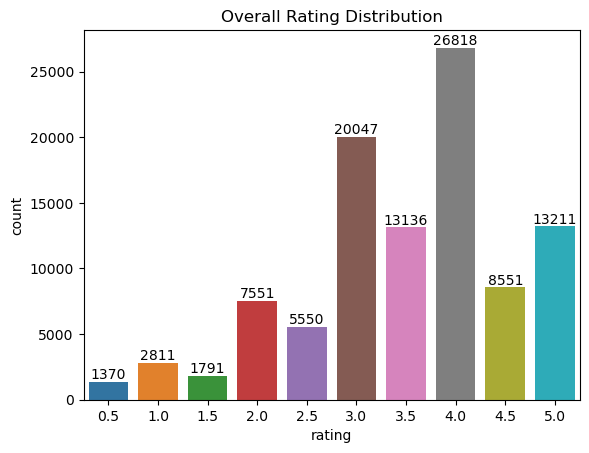

In [53]:
plt.title('Overall Rating Distribution')
ax= sns.countplot(x=rating_df["rating"])
for container in ax.containers:
    ax.bar_label(container)
plt.show()

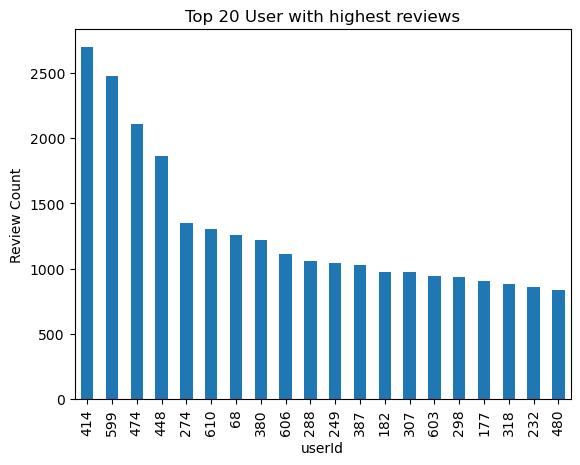

In [66]:
rating_df.groupby('userId').userId.count().sort_values(ascending=False).head(20)\
.plot.bar(ylabel='Review Count', title="Top 20 User with highest reviews")
plt.show()

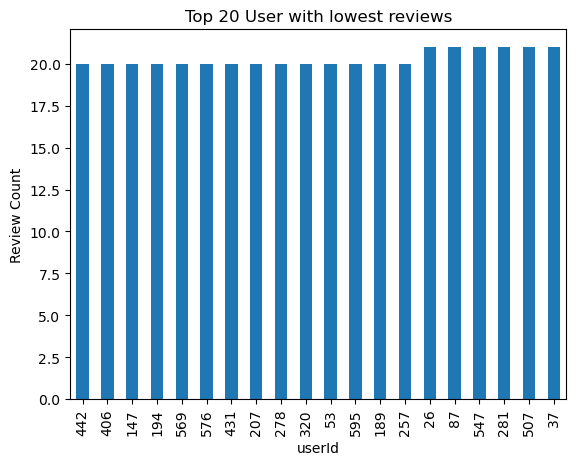

In [68]:
rating_df.groupby('userId').userId.count().sort_values(ascending=True).head(20)\
.plot.bar(ylabel='Review Count', title="Top 20 User with lowest reviews")
plt.show()